# Задачи на логику

1. Рекламная кампания стартовала вчера с дневным бюджетом 40 $. Половина
бюджета была израсходована к полудню, а 80% оставшегося бюджета было
потрачено между полуднем и временем закрытия. Сколько долларов не было
потрачено?

In [1]:
40 - (40 / 2 + (40 / 2) * 0.8)

4.0

2. 5 идентичных рекламных кампаний работали 24 дня по 6 часов в день,
потрачено было 120 долларов. Сколько дней они работали бы на 216 долларов,
если бы 9 одинаковых кампаний работали бы по 8 часов в день?

x - затраты одной компании дол/час
y - количество рабочих дней для 9 компаний

5 * 24 * 6 * x = 120
9 * y * x * 8 = 216

720 / 72y = 120/216
120y = 2160
y = 18

3. Дизайнеры создали 200 рекламных баннеров для двух рекламных кампаний. 80
из них не использовались ни в кампании No1, ни в кампании No2, 60
использовались только в кампании No1. И для каждого рекламного баннера,
который использовался в обеих кампаниях, приходится 3 баннера, которые
использовались только в кампании No2. Сколько баннеров было использовано в
обеих рекламных кампаниях?

200 - 80 = 120 свободных
( 60 ( x )  3x) - пересечение двух множеств
 ^ No1     ^ No2

60 + x + 3x + x = 120
5x = 60
x = 12

12 в обеих, 72 в первой, 48 во второй

4. Энн использует Instagram, но не Facebook, а Джон использует Youtube и
Facebook. Кейт использует Youtube, но не Instagram, а Том использует Facebook,
но не Youtube. Если каждый человек использует две из трех социальных сетей,
у кого предпочтения совпадают?

5. Средний итоговый балл стажера по 4 модулям составляет 78 баллов. Сколько
баллов должен получить стажер за 5-й модуль, чтобы средний балл по всему
заданию составил 80?

x - сумма за 4 модуля
y - балл за пятый

x / 4 = 78
x = 312

(312 + y) / 5 = 80
y = 400 - 312 = 88

6. Заказанные в приложении товары доставляются на автомобиле. Автомобиль
проезжает 260 км со средней скоростью 80 км / ч. На обратном пути машина
движется со средней скоростью 100 км / ч. Насколько быстрее был обратный
путь? Ответ указать в минутах.

80 * x = 260
путь1 = 260 / 80 = 13 / 4 = 3.25 часа
путь2 = 260 / 100 = 2.6 часа
обратный путь был быстрее на (3.25 - 2.6) * 60 = 0.65 * 60 = 39 минут

# Техническое задание

## Обзор и предварительная обработка

In [2]:
import pandas as pd
import numpy as np

In [3]:
url='https://docs.google.com/spreadsheets/d/1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno/edit?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
url

'https://drive.google.com/uc?id=1t2Bl9Jc0JCWOaeFgADJ2bVdoLdjDTWno'

In [4]:
df = pd.read_excel(url)

In [5]:
df.head()

,client_id,sum,status,sale,new/current,Unnamed: 5,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,NaN,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,NaN,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,NaN,оригинал,2021-06-08 00:00:00


In [6]:
df.shape

(730, 8)

Проверка количества NaN

In [7]:
df.isna().sum()

client_id           6
sum                 6
status              0
sale                6
new/current         6
Unnamed: 5        730
document           21
receiving_date    123
dtype: int64

In [8]:
df.dtypes

client_id         float64
sum               float64
status             object
sale               object
new/current        object
Unnamed: 5        float64
document           object
receiving_date     object
dtype: object

Избавляемся от полностью пустых столбцов

In [9]:
empty_cols = df.isnull().all(axis = 0)
empty_cols_names = empty_cols[empty_cols == True].index.tolist()

In [10]:
df.drop(empty_cols_names, axis = 1, inplace = True)

In [11]:
df

,client_id,sum,status,sale,new/current,document,receiving_date
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00
...,...,...,...,...,...,...,...
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00


Избавляемся от разделений на периоды в столбце неподходящем для этого столбце status

In [12]:
date_indexes = df.loc[:, df.columns != 'status'].isnull().all(axis = 1)
date_indexes = date_indexes[date_indexes == True].index.tolist()
date_indexes

[0, 129, 258, 369, 484, 594]

In [13]:
date_names = df.iloc[date_indexes].status.tolist()
date_names = [(date.split(' ')[0], int(date.split(' ')[1])) for date in date_names]
date_names

[('Май', 2021),
 ('Июнь', 2021),
 ('Июль', 2021),
 ('Август', 2021),
 ('Сентябрь', 2021),
 ('Октябрь', 2021)]

In [14]:
month_name_to_number = dict(map(lambda x, y : (x[0],y), date_names, range(5, 11, 1)))

In [15]:
from itertools import pairwise
date_indexes.append(df.shape[0])
date_ranges = [(pair[0], pair[1] - 1) for pair in pairwise(date_indexes)]
date_ranges

[(0, 128), (129, 257), (258, 368), (369, 483), (484, 593), (594, 729)]

In [16]:
for date_range, date_name in zip(date_ranges, date_names):
    left, right = date_range
    month, year = date_name
    df.loc[left:right, 'current_year'] = year
    df.loc[left:right, 'current_month'] = month_name_to_number[month]

In [17]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month
0,NaN,NaN,Май 2021,NaN,NaN,NaN,NaN,2021.0,5.0
1,6.0,11693.7,ВНУТРЕННИЙ,-,-,-,-,2021.0,5.0
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,2021.0,5.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021.0,5.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021.0,5.0


In [18]:
df.drop(date_indexes[:-1], axis = 0, inplace = True)

Можно сделать мульти-индекс, если нужен будет более глубокий анализ

df.set_index(\['current_year', 'current_month'\], drop = True, inplace = True, append = True)

df.head()

Заменяем значения в первой строке на NaN

In [19]:
df.loc[df['status'] == 'ВНУТРЕННИЙ', ['sale', 'new/current', 'document', 'receiving_date']] = np.nan

Проверка изменений

In [20]:
df.head()

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month
1,6.0,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaN,2021.0,5.0
2,14.0,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26 00:00:00,2021.0,5.0
3,15.0,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021.0,5.0
4,16.0,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08 00:00:00,2021.0,5.0
5,18.0,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07 00:00:00,2021.0,5.0


In [21]:
df.iloc[125: 130, :]

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month
126,284.0,8903.7,ПРОСРОЧЕНО,Филимонова,текущая,оригинал,2021-07-27 00:00:00,2021.0,5.0
127,286.0,3453.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-05-31 00:00:00,2021.0,5.0
128,287.0,6368.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-06-29 00:00:00,2021.0,5.0
130,316.0,35653.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-08-09 00:00:00,2021.0,6.0
131,15.0,13518.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-09 00:00:00,2021.0,6.0


In [22]:
df.iloc[255: 258, :]

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month
257,287.0,6543.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-08-12 00:00:00,2021.0,6.0
259,15.0,13838.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00,2021.0,7.0
260,16.0,1586.5,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-08-09 00:00:00,2021.0,7.0


In [23]:
df.tail()

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month
725,285.0,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15 00:00:00,2021.0,10.0
726,360.0,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaN,2021.0,10.0
727,360.0,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaN,2021.0,10.0
728,373.0,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08 00:00:00,2021.0,10.0
729,286.0,3978.7,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-11-15 00:00:00,2021.0,10.0


In [24]:
df.isna().sum()

client_id           0
sum                 0
status              0
sale                1
new/current         1
document           16
receiving_date    118
current_year        0
current_month       0
dtype: int64

Теперь можно переконвертировать client_id в int

In [25]:
df = df.astype({'client_id': 'int16', 'current_year': 'int16', 'current_month': 'int16'})

In [26]:
df['receiving_date'] = pd.to_datetime(df['receiving_date'])

## Вопросы

### 1) Вычислите общую выручку за июль 2021 по тем сделкам, приход денежных средств которых не просрочен.

In [27]:
df.status.unique()

array(['ВНУТРЕННИЙ', 'ОПЛАЧЕНО', 'ПРОСРОЧЕНО', 'В РАБОТЕ',
       'НА ПОДПИСАНИИ'], dtype=object)

In [28]:
df[(df['status'] != 'ПРОСРОЧЕНО') & (df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Июль'])]['sum'].sum()

859896.4699999997

### 2) Как изменялась выручка компании за рассматриваемый период? Проиллюстрируйте графиком.

<Axes: >

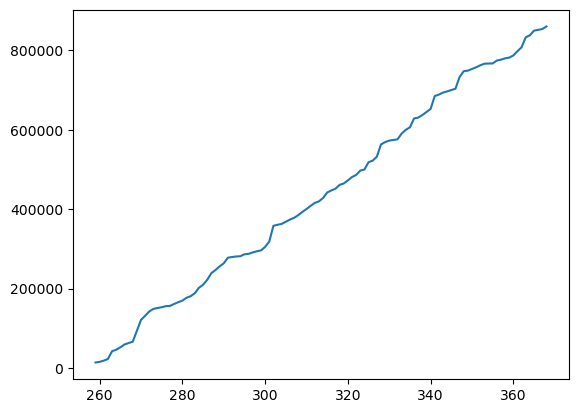

In [29]:
# Для более красивых графиков я бы использовал библиотеки Plotly или Seaborn
df[(df['status'] != 'ПРОСРОЧЕНО') & (df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Июль'])]['sum'].cumsum().plot()

### 3) Кто из менеджеров привлек для компании больше всего денежных средств в сентябре 2021?

Стоит ли учитывать транзакции "на подписании" и "в работе"? В вопросе ничего об этом не сказано, так что считаем вне зависимости от статуса.

In [30]:
df[(df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Сентябрь'])].groupby(['sale'])['sum'].sum().sort_values(ascending = False)

sale
Смирнов       221525.70
Петрова       149344.46
Андреев       133652.50
Иванов         94770.60
Кузнецова      72228.40
Филимонова     59514.47
Васильев       49895.45
Соколов        35183.50
Михайлов        4268.70
Name: sum, dtype: float64

### 4) Какой тип сделок (новая/текущая) был преобладающим в октябре 2021?

In [31]:
df[(df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Октябрь'])]['new/current'].value_counts()

new/current
текущая    99
новая      36
Name: count, dtype: int64

<Axes: xlabel='new/current'>

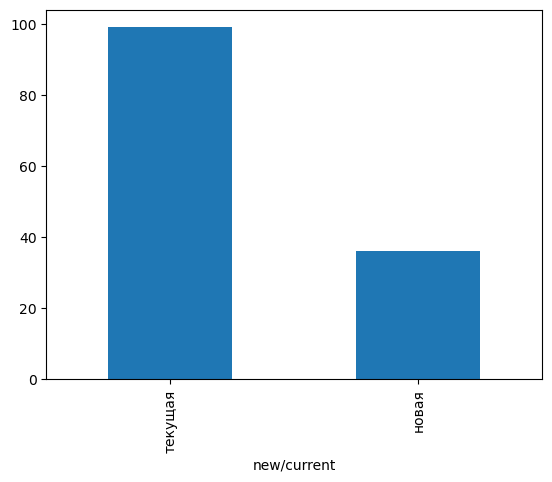

In [32]:
df[(df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Октябрь'])]['new/current'].value_counts().plot(kind = 'bar')

### 5) Сколько оригиналов договора по майским сделкам было получено в июне 2021?

In [33]:
df[(df['current_year'] == 2021) & (df['current_month'] == month_name_to_number['Июнь'])]['document'].value_counts()

document
оригинал    126
НЕТ           1
Name: count, dtype: int64

## Задание:

За каждую заключенную сделку менеджер получает бонус, который рассчитывается
следующим образом.

1) За новые сделки менеджер получает 7 % от суммы, при условии, что статус
оплаты «ОПЛАЧЕНО», а также имеется оригинал подписанного договора с
клиентом (в рассматриваемом месяце).
2) За текущие сделки менеджер получает 5 % от суммы, если она больше 10 тыс.,
и 3 % от суммы, если меньше. При этом статус оплаты может быть любым,
кроме «ПРОСРОЧЕНО», а также необходимо наличие оригинала подписанного
договора с клиентом (в рассматриваемом месяце).

Бонусы по сделкам, оригиналы для которых приходят позже рассматриваемого
месяца, считаются остатком на следующий период, который выплачивается по мере
прихода оригиналов. 

Вычислите остаток каждого из менеджеров на 01.07.2021.

новая и оплачено и оригинал и дельта от даты договора < 1 = 7%

текущая и >10тыс и !просрочено и дельта от июля < 0 = 5%

текущая и <10тыс и !просрочено и дельта от июля < 0 = 3%

*было бы здоро иметь пример для каждого из условий*

In [34]:
df.dtypes

client_id                  int16
sum                      float64
status                    object
sale                      object
new/current               object
document                  object
receiving_date    datetime64[ns]
current_year               int16
current_month              int16
dtype: object

In [35]:
def month_year_converter(row):
    return pd.Timestamp(month = row['current_month'], year = row['current_year'], day = row['receiving_date'].day)
df['current_date_helper'] = df[~df['receiving_date'].isnull()].apply(lambda row: month_year_converter(row), axis=1)

In [36]:
# В том же месяце
def is_in_this_month(row):
    return not bool(row['receiving_date'].month - row['current_date_helper'].month)
df['is_in_this_month'] = df[~df['current_date_helper'].isnull()].apply(lambda row: is_in_this_month(row), axis = 1)

In [37]:
# Дельта между датой получения договора и 1ым Июля
def receive_july_delta(row):
    return pd.Timestamp(month = row['receiving_date'].month, year = row['receiving_date'].year, day = row['receiving_date'].day) - pd.Timestamp(month = 7, year = 2021, day = 1)
df['receive_july_delta'] = df[~df['receiving_date'].isnull()].apply(lambda row: receive_july_delta(row), axis = 1)

In [38]:
#from IPython.display import display, HTML
#display(HTML(df.to_html()))

In [39]:
df

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month,current_date_helper,is_in_this_month,receive_july_delta
1,6,11693.7,ВНУТРЕННИЙ,NaN,NaN,NaN,NaT,2021,5,NaT,NaN,NaT
2,14,5452.7,ОПЛАЧЕНО,Петрова,новая,оригинал,2021-07-26,2021,5,2021-05-26,False,25 days
3,15,13991.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021,5,2021-05-08,False,-23 days
4,16,719.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-06-08,2021,5,2021-05-08,False,-23 days
5,18,4253.7,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021,5,2021-05-07,False,6 days
...,...,...,...,...,...,...,...,...,...,...,...,...
725,285,4328.7,ОПЛАЧЕНО,Васильев,текущая,оригинал,2021-11-15,2021,10,2021-10-15,False,137 days
726,360,3096.2,ОПЛАЧЕНО,Васильев,новая,НЕТ,NaT,2021,10,NaT,NaN,NaT
727,360,3096.2,ПРОСРОЧЕНО,Васильев,новая,НЕТ,NaT,2021,10,NaT,NaN,NaT
728,373,4403.7,ОПЛАЧЕНО,Михайлов,новая,оригинал,2021-11-08,2021,10,2021-10-08,False,130 days


По первому условию значений нет

In [40]:
mask = (df['new/current'] == 'новая') & (df['status'] == 'ОПЛАЧЕНО') & (df['is_in_this_month'] == True) & (df['current_month'] < 7)
df[mask]

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month,current_date_helper,is_in_this_month,receive_july_delta


Все записи до 1 Июля, где договоры были получены уже после этой даты

In [41]:
mask = (df['current_month'] < 7) & (df['new/current'] == 'текущая') & (df['status'] != 'ПРОСРОЧЕНО') & (df['receive_july_delta'] > pd.Timedelta("0 days"))
df[mask]

,client_id,sum,status,sale,new/current,document,receiving_date,current_year,current_month,current_date_helper,is_in_this_month,receive_july_delta
5,18,4253.70,ОПЛАЧЕНО,Иванов,текущая,оригинал,2021-07-07,2021,5,2021-05-07,False,6 days
6,20,5796.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-07-15,2021,5,2021-05-15,False,14 days
7,21,3613.70,ОПЛАЧЕНО,Кузнецова,текущая,оригинал,2021-10-13,2021,5,2021-05-13,False,104 days
12,32,7353.90,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,2021,5,2021-05-09,False,8 days
13,34,3892.52,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-09,2021,5,2021-05-09,False,8 days
...,...,...,...,...,...,...,...,...,...,...,...,...
251,273,10133.70,ОПЛАЧЕНО,Петрова,текущая,оригинал,2021-07-06,2021,6,2021-06-06,False,5 days
252,277,4798.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-08,2021,6,2021-06-08,False,7 days
253,281,5733.70,ОПЛАЧЕНО,Селиванов,текущая,оригинал,2021-07-22,2021,6,2021-06-22,False,21 days
256,286,3453.70,ОПЛАЧЕНО,Филимонова,текущая,оригинал,2021-07-22,2021,6,2021-06-22,False,21 days


Итог по второму условию

In [42]:
def calc_salesman_percent(row):
    return row['sum'] * 0.05 if row['sum'] > 10000.0 else row['sum'] * 0.03
df['salesman_percent'] = df[mask].apply(lambda row: calc_salesman_percent(row), axis = 1)
df[mask].groupby(['sale'])['salesman_percent'].sum()

sale
Андреев       3866.3687
Васильев       849.5400
Иванов        5778.7910
Кузнецова     4496.9501
Петрова       7893.2994
Селиванов      960.7770
Смирнов       6913.5090
Соколов        269.2110
Филимонова    1590.4899
Name: salesman_percent, dtype: float64

In [43]:
#from IPython.display import display, HTML
#display(HTML(df[mask].to_html()))